### Reading in Dataset

In [75]:
# Importing libraries
import pandas as pd
import numpy as np

In [76]:
# Read in the data from the data folder

customer = pd.read_csv("C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/WHOLESALE DATASET PROJECT 2/Wholsalecustomer.csv")
customer.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


### 1. Exploratory Data Analysis

In [77]:
# Check the number of rows and columns in the data
customer.shape

(440, 8)

In [78]:
#finding out columns name
customer.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [79]:
# Check the type of data stored in each column
customer.dtypes
# we see that we have 8 numerical variables

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [80]:
#finding out datatype of each column
customer.info()
# We can see that all the columns are integer type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [81]:
# Checking for missing values
customer.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

#### No missing values found

In [83]:
#getting a quick summary of distribuition of data
customer.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


**Observation1:** No Missing values in any column

**Observation2:** Channel variable have only two values that is 1 and 2 where 1 = Horeca (Hotel/Retail/Café) customers and 2 = Retail channel (nominal) customers.

**Observation3:** Regioncolumn have limited range of values that is 1, 2 and 3 where 1 = Lisnon, 2 = Oporto and 3 = others

#### Our dataset have 
* categorical_features = Channel, Region
* continuous_features = Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen

In [84]:
# See the distribution of our categorical features
customer['Channel'].value_counts()

1    298
2    142
Name: Channel, dtype: int64

* Not a 50-50 split in data. Semi-imabalanced column

In [85]:
customer['Region'].value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

In [86]:
# Looking at the correlation matrix 
customer.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


**Observation1:** Groccery and Detergents_Paper are highly positively correlated with a value of 0.92

**Observation2:** Groccery and Milk are highly positively correlated with a value of 0.72

**Observation3:** Milk and Detergent_paper are highly positively correlated with a value of 0.66

**Observation4:** Frozen and Fresh are positively correlated with a value of 0.34

**Observation5:** Delicassen and Milk are positively correlated with a value of 0.40

**Observation6:** Delicassen and Frozen are positively correlated with a value of 0.39

### 2. Feature Scaling 

* In our dataset, some features have varying magnitudes, with some having high-magnitude values and others having relatively lower values. This variation in magnitudes can cause problems in machine learning models as they may assign more weightage to the features with higher magnitudes. To avoid this issue, feature scaling is performed to normalize the data and ensure that all features contribute equally to the model training process. By scaling the features to a similar magnitude, the model's predictions become more accurate and reliable.

In [87]:
# Some libraries tend to be in flux for their dependency versions
import warnings
warnings.simplefilter("ignore")

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets

%matplotlib inline

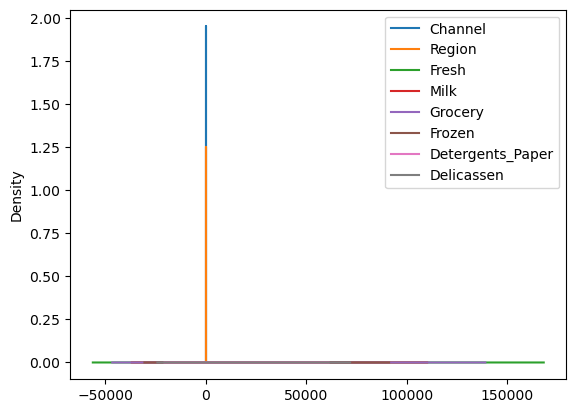

In [88]:
pd.DataFrame(customer).plot(kind='kde');

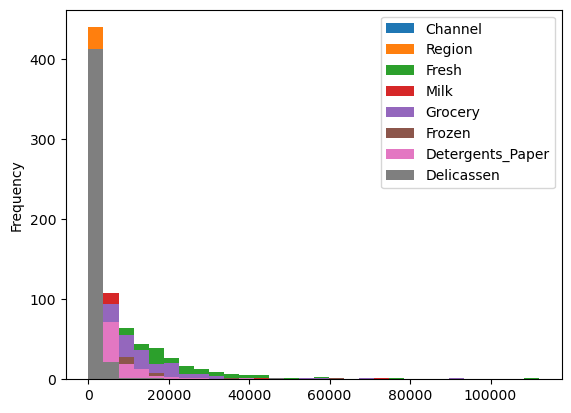

In [89]:
pd.DataFrame(customer).plot(kind='hist', bins=30);

#### Observation
* We can see that column Delicassen have high magnitude values compared to other columns. So we will perform StandardScaler and Minmax Scaler to scale these column so that data can be normalized and all feature contribute equally to model training process

### StandardScaler

The most commonly used scaler—as the name indicates—is `StandardScaler`. 

This standardizes features by removing the mean and scaling to unit variance.  It loosely assumes that the underlying data is Gaussian to start with, but mostly it is fairly robust against moderate violations of that distribution.  Calculating the mean and standard deviation is per-column (as for all scalers).

In [90]:
from sklearn.preprocessing import StandardScaler
scaled1 = StandardScaler().fit_transform(customer)

scaled_ss = pd.DataFrame(scaled1, columns=customer.columns)

scaled_ss.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [91]:
pd.DataFrame(scaled_ss).describe().head(3)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-2.452584e-16,-5.737834e-16,-2.422305e-17,-1.589638e-17,-6.030530e-17,1.135455e-17,-1.917658e-17,-8.276208e-17
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00


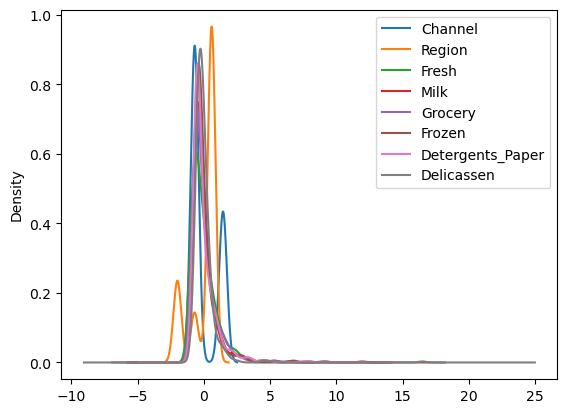

In [92]:
pd.DataFrame(scaled_ss).plot(kind='kde');

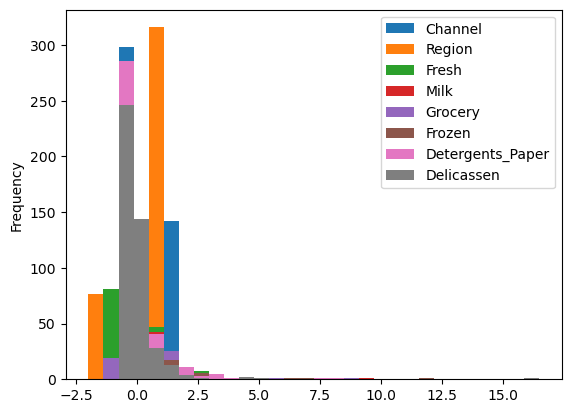

In [93]:
pd.DataFrame(scaled_ss).plot(kind='hist', bins=30);

#### Observation
* Using the StandardScaler method, we have scaled the data into a uniform unit over all the columns. As you can see in the table, the values of all the features have been converted into a uniform range of the same scale. Because of this, it becomes easier for the model to make predictions.
* In both plots we can see that columns are normalized and scales of different features are more comparable. 
* Kde plot shows better visualization than histogram as normalisation of columns are clearly visible in kde compared to histogram

### MinMaxScaler

Transforms features by scaling each feature to a given range. This estimator scales and translates each feature individually such that it is in the given range on the dataset, by default between zero and one.

In [94]:
from sklearn.preprocessing import MinMaxScaler
scaled2 = MinMaxScaler().fit_transform(customer)
scaled_mms = pd.DataFrame(scaled2, columns=customer.columns)

scaled_mms.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,1.0,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,1.0,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.0,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,1.0,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


In [95]:
pd.DataFrame(scaled_mms).describe().head(3)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.00000,440.000000
mean,0.322727,0.771591,0.106977,0.078173,0.085671,0.050078,0.07051,0.031745
std,0.468052,0.387136,0.112774,0.100491,0.102430,0.079789,0.11679,0.058826


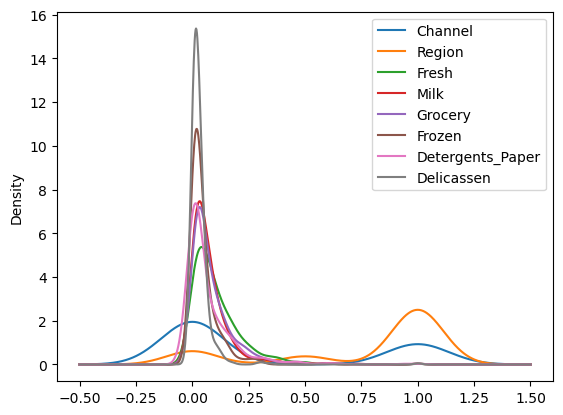

In [96]:
pd.DataFrame(scaled_mms).plot(kind='kde');

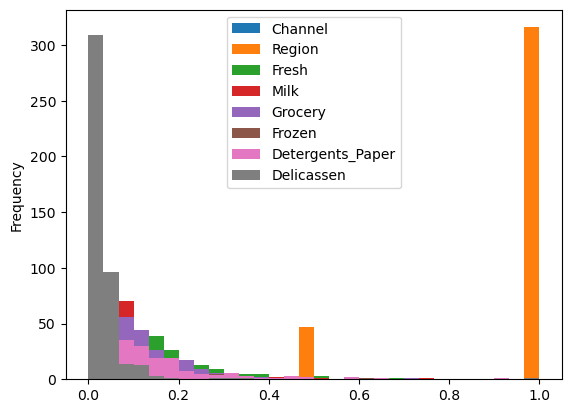

In [97]:
pd.DataFrame(scaled_mms).plot(kind='hist', bins=30);

#### Observation
* We have utilized the MinMaxScaler technique to normalize the data across all columns to a consistent unit. As evidenced in the table, all feature values have been transformed into a uniform range of the same scale, which ranges from 0 to 1.
* We can see that in histofram and kde of Minmax scaler that magnitude of value of column Delicassen is still higher than compared to other features, Standard scaler did a better job to scale them.
* The StandardScaler technique assumes that the data features are normally distributed and scales them to have a mean of zero and a standard deviation of one. This scaling results in all features being on the same scale. On the other hand, MinMaxScaler compresses the data into the range of 0 to 1 and is suitable for non-Gaussian distributions with small standard deviations. However, this scaler can be influenced by outliers. The visual representation of these two scalers differ, with StandardScaler displaying centered curves without outliers and MinMaxScaler exhibiting outliers. Based on this analysis, we will proceed with using StandardScaler for this task.

In [110]:
# taking channel as target variable
X = scaled_ss.drop(['Channel'], axis=1)
y = customer['Channel']

y.head()

0    2
1    2
2    2
3    1
4    2
Name: Channel, dtype: int64

### 3. RFECV

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
lr, knn = LinearRegression(), KNeighborsClassifier()

In [112]:
# Recursive feature elimination
from sklearn.feature_selection import RFE

lr = LinearRegression()
rfe = RFE(estimator=lr, n_features_to_select=5, step=1) 
rfe.fit(X, y)

pd.Series(rfe.ranking_, index=X.columns).sort_values(ascending=False).head(10)

Delicassen          3
Region              2
Fresh               1
Milk                1
Grocery             1
Frozen              1
Detergents_Paper    1
dtype: int32

#### RFECV and the plot between the Number of features selected vs Cross-Validation Score 

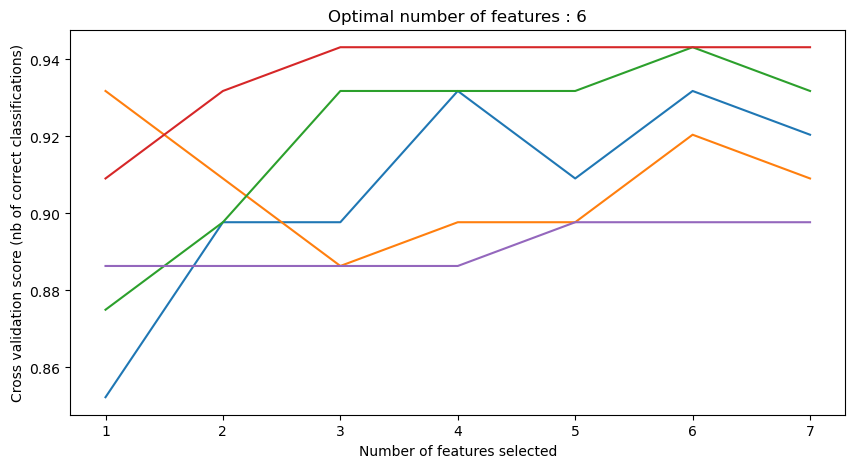

In [113]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

rf = RandomForestClassifier(max_depth=7, random_state=1)
rfecv = RFECV(estimator=rf)
rfecv.fit(X, y)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.title("Optimal number of features : %d" % rfecv.n_features_)
plt.show()

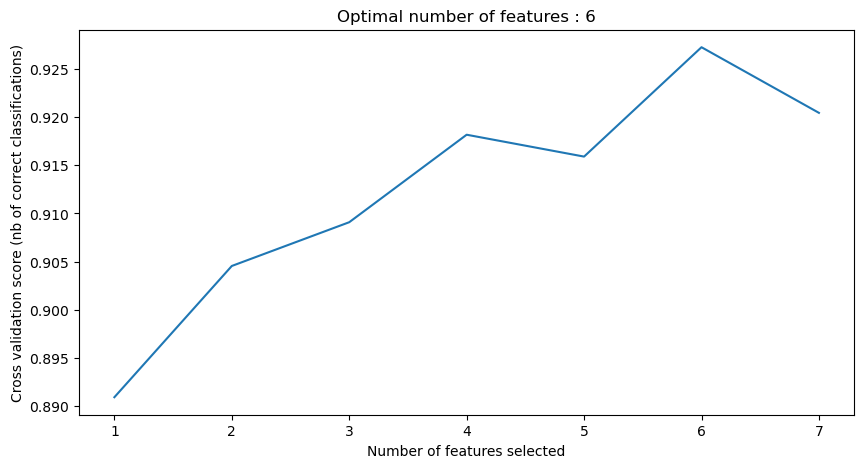

In [114]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

rf = RandomForestClassifier(max_depth=7, random_state=1)
rfecv = RFECV(estimator=rf)
rfecv.fit(X, y)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.cv_results_['mean_test_score'])
plt.title("Optimal number of features : %d" % rfecv.n_features_)
plt.show()

#### Observation
* The graph between the cross-validation score and the number of features is used to determine the optimal number of features for the model. By utilizing Recursive Feature Elimination with Cross-Validation (RFECV), we were able to narrow down the optimal number of features to six. This graph allows us to visualize the performance of the model as the number of features increases, allowing us to select the optimal number of features that provides the best balance between bias and variance. The RFECV method iteratively removes the least important features and recalculates the cross-validation score until the optimal number of features is reached. This visualization is useful for selecting the best subset of features that maximize the model's predictive power while minimizing the risk of overfitting.

###  4. KMeans Clustering and Elbow Method

In [131]:
#importing libraries
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [132]:
# Loop through clusters and fit the model to the train set
clusters=range(2,15)
meandist=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(scaled_ss)
    clusassign=model.predict(scaled_ss)
    meandist.append(sum(np.min(cdist(scaled_ss, model.cluster_centers_, 'euclidean'), axis=1),data.shape[0]))

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

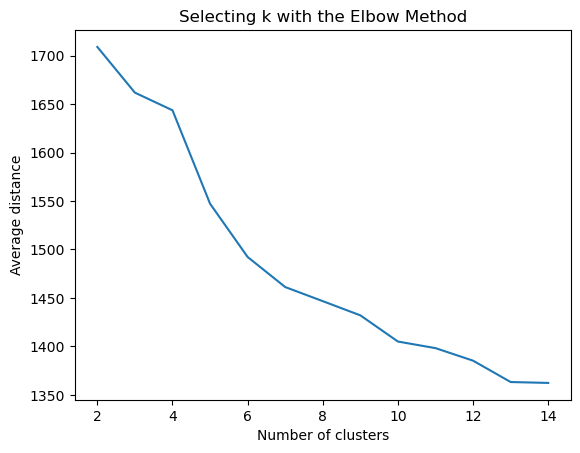

In [133]:
# display the data
plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method')

#### Observation
* The elbow method graph is used to determine the optimal number of clusters (K) for K-means clustering. By plotting the average distance between data points and the number of clusters, we can visually identify the point where adding more clusters no longer significantly reduces the average distance. This point is known as the "elbow" of the graph and represents the optimal number of clusters for the model. In this case, the elbow method graph suggests that the optimal number of clusters is 6, as this is the point at which adding more clusters does not significantly decrease the average distance between data points. Selecting K as 6 provides a good balance between capturing the underlying patterns in the data while minimizing the complexity of the model. The elbow method visualization is a useful tool for selecting the optimal number of clusters for unsupervised learning tasks like K-means clustering.

### 5. PCA

In [142]:
scaled_ss.shape

(440, 8)

In [188]:
# By taking n components as 2
from sklearn.decomposition import PCA

pca2 = PCA(n_components=2)
pca2.fit(scaled_ss)
X_pca2 = pca2.transform(scaled_ss)
print("Original shape: %s" % str(scaled_ss.shape))
print("Reduced shape: %s" % str(X_pca2.shape))

Original shape: (440, 8)
Reduced shape: (440, 2)


In [202]:
print("Explained variance is:",pca2.explained_variance_)
print("Explained variance ratio",pca2.explained_variance_ratio_)
print("Variance explained by first 2 components:", sum(pca2.explained_variance_ratio_))

Explained variance is: [3.10707136 1.79404441]
Explained variance ratio [0.38750123 0.22374588]
Variance explained by first 2 components: 0.611247108626315


* The results indicate that the first principal component contains 38.75% of the total information, whereas the second principal component only contains 22.37% of the total information.

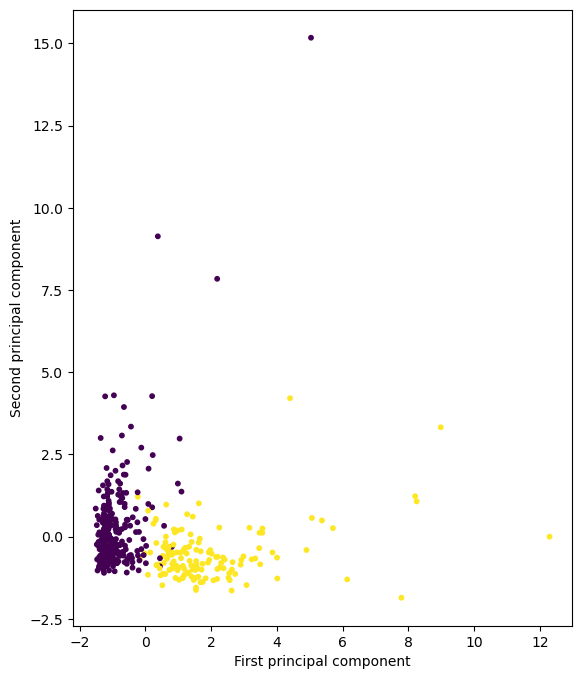

In [190]:
# plot 1st vs 2nd principal component, color by class
plt.figure(figsize=(8, 8))
plt.scatter(X_pca2[:, 0], X_pca2[:, 1], 
            c=y, s=10)
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component");

#### Observation
* The scatter plot between the first principal component and second principal component in PCA is a visualization tool used to understand the distribution of data in a lower-dimensional space. PCA is a dimensionality reduction technique that transforms high-dimensional data into a lower-dimensional space while retaining the most important information.
* By plotting the first and second principal components on a scatter plot, we can visualize how the data is distributed in this reduced two-dimensional space. 
* This scatter plot shows a clear separation of clusters which indicates that the PCA transformation has effectively captured the underlying structure of the data. 

In [191]:
# By taking n components as 4
from sklearn.decomposition import PCA

pca4 = PCA(n_components=4)
pca4.fit(scaled_ss)
X_pca4 = pca4.transform(scaled_ss)
print("Original shape: %s" % str(scaled_ss.shape))
print("Reduced shape: %s" % str(X_pca4.shape))

Original shape: (440, 8)
Reduced shape: (440, 4)


In [261]:
print("Explained variance is:",pca4.explained_variance_)
print("Explained variance ratio",pca4.explained_variance_ratio_)
print("Variance explained by first 4 components:", sum(pca4.explained_variance_ratio_))

Explained variance is: [3.10707136 1.79404441 1.0140786  0.74007428]
Explained variance ratio [0.38750123 0.22374588 0.12647173 0.09229904]
Variance explained by first 4 components: 0.8300178803359718


* According to the output shown above, it can be observed that the first principal component contains 38.75% of the total information, the second principal component contains only 22.37% of the total information, the third principal component contains 12% of the total information, and the fourth principal component contains 9% of the total information.

In [194]:
import plotly.express as px

In [204]:
n_components = 4
total_var = pca4.explained_variance_ratio_.sum() * 100

labels = {str(i): f"PC {i+1}" for i in range(n_components)}
labels['color'] = 'Median Price'

fig = px.scatter_matrix(
    X_pca4,
    color=y,
    dimensions=range(n_components),
    labels=labels,
    title=f'Total Explained Variance: {total_var:.2f}%',
)
fig.update_traces(diagonal_visible=False)
fig.show()


#### Observations
* Some scatter plots shows a clear seperation of clusters or groups, which indicates PCA has effectively captured the underlying structure of the data while some scatter plot shows no clear seperation of cluster or groups which indicate PCA transformation is not effective or that data may not have distinct structure. 

### 6. XGBoost Classifier with 5 Fold CV

In [241]:
from sklearn.model_selection import train_test_split

In [242]:
# converting target value to binary
X = scaled_ss.drop(['Channel'], axis=1)
y = customer['Channel']

y[y == 2] = 0

y[y == 1] = 1

y.head()

0    0
1    0
2    0
3    1
4    0
Name: Channel, dtype: int64

In [243]:
#Splitting data into train validation and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [245]:
#writing out splitted data
X_train.to_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/WHOLESALE DATASET PROJECT 2/Traindata/train_features.csv', index=False)
X_val.to_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/WHOLESALE DATASET PROJECT 2/Traindata/val_features.csv', index=False)
X_test.to_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/WHOLESALE DATASET PROJECT 2/Traindata/test_features.csv', index=False)

y_train.to_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/WHOLESALE DATASET PROJECT 2/Traindata/train_labels.csv', index=False)
y_val.to_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/WHOLESALE DATASET PROJECT 2/Traindata/val_labels.csv', index=False)
y_test.to_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/WHOLESALE DATASET PROJECT 2/Traindata/test_labels.csv', index=False)


In [218]:
!pip install xgboost

In [246]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

#reading training data
tr_features = pd.read_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/WHOLESALE DATASET PROJECT 2/Traindata/train_features.csv')
tr_labels = pd.read_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/WHOLESALE DATASET PROJECT 2/Traindata/train_labels.csv')

In [247]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [248]:
xgb = XGBClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

cv = GridSearchCV(xgb, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}

0.921 (+/-0.055) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.921 (+/-0.055) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.921 (+/-0.055) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.924 (+/-0.063) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.909 (+/-0.073) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.913 (+/-0.07) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.902 (+/-0.036) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.898 (+/-0.045) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.909 (+/-0.073) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.913 (+/-0.081) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.905 (+/-0.033) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.905 (+/-0.047) for {'learning_r

In [249]:
#printing out best estimator
cv.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

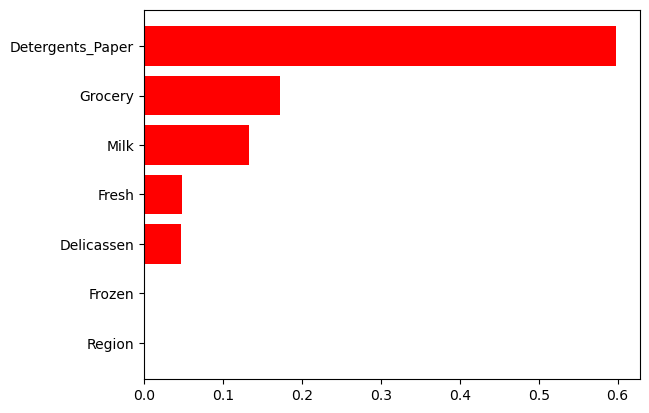

In [250]:
# Generate feature importance plot
feat_imp = cv.best_estimator_.feature_importances_
indices = np.argsort(feat_imp)
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

#### Observation
* the feature importance plot is showing that the feature "Detergents_Paper" has the highest importance score among all the features. This means that the "Detergents_Paper" feature is contributing the most to the accuracy of the XGB classifier model.
* the feature importance plot in XGB classifier model indicates that the "Detergents_Paper" feature is a critical feature for accurate predictions and should be considered as a significant factor in any analysis or decision-making process related to your data.

In [251]:
import joblib

In [252]:
#Pickling the best model using joblib
joblib.dump(cv.best_estimator_, 'C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/WHOLESALE DATASET PROJECT 2/XGB_model.pkl')

['C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/WHOLESALE DATASET PROJECT 2/XGB_model.pkl']

In [253]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time

In [239]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = xgb.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)
    recall = round(recall_score(labels, pred), 3)
    print('{} -- \tAccuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                     accuracy,
                                                                                     precision,
                                                                                     recall,
                                                                                     round((end - start)*1000, 1)))

In [254]:
models = {}

for mdl in ['XGB']:
    models[mdl] = joblib.load('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/WHOLESALE DATASET PROJECT 2/{}_model.pkl'.format(mdl))

In [255]:
models

{'XGB': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.01, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=1, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=500, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...)}

In [256]:
#reading validation datasets
val_features = pd.read_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/WHOLESALE DATASET PROJECT 2/Traindata/val_features.csv')
val_labels = pd.read_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/WHOLESALE DATASET PROJECT 2/Traindata/val_labels.csv')

In [257]:
#function to evaluate models
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred, average = 'weighted'), 3)
    recall = round(recall_score(labels, pred, average = 'weighted'), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))

In [258]:
#evaluating models on validation sets
for name, mdl in models.items():
    evaluate_model(name, mdl, val_features, val_labels)

XGB -- Accuracy: 0.909 / Precision: 0.913 / Recall: 0.909 / Latency: 3.0ms


In [259]:
#reading test datasets
test_features = pd.read_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/WHOLESALE DATASET PROJECT 2/Traindata/test_features.csv')
test_labels = pd.read_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/WHOLESALE DATASET PROJECT 2/Traindata/test_labels.csv')

In [260]:
# evaluating model on test set
evaluate_model('XGB', models['XGB'], test_features, test_labels)

XGB -- Accuracy: 0.909 / Precision: 0.928 / Recall: 0.909 / Latency: 2.0ms


#### Observation
* Accuracy: 0.909
* Precision: 0.928
* Recall: 0.909
* Latency: 2.0ms